# Library

In [1]:
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 53.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 31.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 45.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif

## Data Wrangling

### Data Collecting

In [3]:
df = pd.read_csv('data.csv')

### Data Assessing

In [4]:
df.shape

(104345, 23)

In [5]:
df.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0


In [6]:
df.tail()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0
104344,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,3,15099,14693,1,1.0,2.0,0


In [7]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

None

In [8]:
# Find duplicate rows based on all columns
duplicate_rows = df[df.duplicated()]

# Print the duplicate rows
print("Duplicate Rows:")
display(duplicate_rows)
print("Count duplicate row: ", len(duplicate_rows))


Duplicate Rows:


,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
13,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
15,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,4,3665,3413,0,0.0,0.0,0
30,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3413,3665,0,0.0,0.0,0
34,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
40,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33474,3249,8,10.0.0.12,10.0.0.5,88782,94641612,197,336000000,1.970000e+11,3,...,451,0,UDP,4,5060,458253204,0,10314.0,10314.0,0
33501,3609,8,10.0.0.3,10.0.0.5,119500,124519000,407,592000000,4.080000e+11,2,...,235,0,UDP,4,5783,689246731,0,1962.0,1962.0,1
33512,3609,8,10.0.0.3,10.0.0.5,119500,124519000,407,592000000,4.080000e+11,2,...,235,0,UDP,3,689246731,5783,1962,0.0,1962.0,1
33559,3159,8,10.0.0.12,10.0.0.5,48292,51479272,107,327000000,1.070000e+11,2,...,451,0,UDP,1,4266,1312,0,0.0,0.0,0


Count duplicate row:  5091


In [9]:
df.describe()

,dt,switch,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,1.043450e+05,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,104345.000000,104345.000000,104345.000000,1.043450e+05,1.043450e+05,104345.000000,103839.000000,103839.000000,104345.000000
mean,17927.514169,4.214260,52860.954746,3.818660e+07,321.497398,4.613880e+08,3.218865e+11,5.654234,5200.383468,6381.715291,4.716150e+06,212.210676,0.600987,2.331094,9.325264e+07,9.328039e+07,998.899756,1003.811420,2007.578742,0.390857
std,11977.642655,1.956327,52023.241460,4.877748e+07,283.518232,2.770019e+08,2.834029e+11,2.950036,5257.001450,7404.777808,7.560116e+06,246.855123,0.489698,1.084333,1.519380e+08,1.330004e+08,2423.471618,2054.887034,3144.437173,0.487945
min,2488.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,-130933.000000,-1.464426e+08,-4365.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,7098.000000,3.000000,808.000000,7.957600e+04,127.000000,2.340000e+08,1.270000e+11,3.000000,1943.000000,29.000000,2.842000e+03,0.000000,0.000000,1.000000,4.743000e+03,3.539000e+03,0.000000,0.000000,0.000000,0.000000
50%,11905.000000,4.000000,42828.000000,6.471930e+06,251.000000,4.180000e+08,2.520000e+11,5.000000,3024.000000,8305.000000,5.521680e+05,276.000000,1.000000,2.000000,4.219610e+06,1.338339e+07,0.000000,0.000000,4.000000,0.000000
75%,29952.000000,5.000000,94796.000000,7.620354e+07,412.000000,7.030000e+08,4.130000e+11,7.000000,7462.000000,10017.000000,9.728112e+06,333.000000,1.000000,3.000000,1.356398e+08,1.439277e+08,251.000000,557.000000,3838.000000,1.000000
max,42935.000000,10.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,19190.000000,1.495387e+07,639.000000,1.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


In [10]:
df.isnull().sum()

,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [11]:
# Display unique values for object type columns
for col in df.select_dtypes(include=['object']):
    print(f"\nUnique values for column '{col}':")
    print(df[col].unique())


Unique values for column 'src':
['10.0.0.1' '10.0.0.2' '10.0.0.4' '10.0.0.10' '10.0.0.3' '10.0.0.5'
 '10.0.0.13' '10.0.0.6' '10.0.0.20' '10.0.0.11' '10.0.0.12' '10.0.0.18'
 '10.0.0.8' '10.0.0.7' '10.0.0.9' '10.0.0.14' '10.0.0.15' '10.0.0.16'
 '10.0.0.17']

Unique values for column 'dst':
['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']

Unique values for column 'Protocol':
['UDP' 'TCP' 'ICMP']


### Data Cleaning

In [12]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify that duplicates have been removed
duplicate_rows_after_removal = df[df.duplicated()]
display(duplicate_rows_after_removal)
print("Count duplicate row after removal: ", len(duplicate_rows_after_removal))

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label


Count duplicate row after removal:  0


In [13]:
# Remove rows with any null values
df = df.dropna()

# Display the DataFrame after removing null values
print("\nDataFrame null values:")
display(df.isnull().sum())



DataFrame null values:


,0
dt,0
switch,0
src,0
dst,0
pktcount,0
bytecount,0
dur,0
dur_nsec,0
tot_dur,0
flows,0


In [14]:
# Display unique values for object type columns and perform encoding
for col in df.select_dtypes(include=['object']):
    print(f"\nUnique values for column '{col}':")
    print(df[col].unique())

    # Encoding using Label Encoding (replace with other methods if needed)
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

    print(f"\nEncoded values for column '{col}':")
    print(df[col].unique())



Unique values for column 'src':
['10.0.0.1' '10.0.0.2' '10.0.0.4' '10.0.0.10' '10.0.0.3' '10.0.0.5'
 '10.0.0.13' '10.0.0.6' '10.0.0.20' '10.0.0.11' '10.0.0.12' '10.0.0.18'
 '10.0.0.8' '10.0.0.7' '10.0.0.9' '10.0.0.14' '10.0.0.15' '10.0.0.16'
 '10.0.0.17']

Encoded values for column 'src':
[ 0 10 13  1 12 14  4 15 11  2  3  9 17 16 18  5  6  7  8]

Unique values for column 'dst':
['10.0.0.8' '10.0.0.7' '10.0.0.3' '10.0.0.5' '10.0.0.10' '10.0.0.13'
 '10.0.0.1' '10.0.0.11' '10.0.0.2' '10.0.0.4' '10.0.0.9' '10.0.0.6'
 '10.0.0.14' '10.0.0.15' '10.0.0.12' '10.0.0.16' '10.0.0.17' '10.0.0.18']

Encoded values for column 'dst':
[16 15 11 13  1  4  0  2 10 12 17 14  5  6  3  7  8  9]

Unique values for column 'Protocol':
['UDP' 'TCP' 'ICMP']

Encoded values for column 'Protocol':
[2 1 0]


<ipython-input-14-93706dd9e9d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
<ipython-input-14-93706dd9e9d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])


In [15]:
#Drop kolom dt
if 'dt' in df.columns:
    df = df.drop('dt', axis=1)
else:
    print("Column 'dt' not found in DataFrame.")


In [16]:
df.to_csv('clean_data.csv', index=False)

## EDA

In [17]:
df = pd.read_csv('clean_data.csv')

In [18]:
df.sample(10)

,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
25534,6,18,13,66264,70637424,147,240000000,1.470000e+11,4,7894,...,451,0,2,1,4414,110591624,0,6476.0,6476.0,0
78504,3,13,13,70945,4114810,229,990000000,2.300000e+11,7,1143,...,310,1,1,4,15551977,290873611,318,4192.0,4510.0,0
27054,7,12,13,61366,63943372,197,410000000,1.970000e+11,2,7916,...,306,0,2,4,5214,484752168,0,2553.0,2553.0,1
29991,3,10,13,41475,46189094,94,361000000,9.436100e+10,7,4918,...,448,1,1,1,7522846,7001482,0,0.0,0.0,0
80931,2,1,11,482,47236,493,24000000,4.930000e+11,4,4920,...,0,1,0,3,106645,135566141,0,0.0,0.0,0
48644,2,12,2,203,19894,208,467000000,2.080000e+11,11,2364,...,0,1,0,3,45311,20997609,1,2873.0,2874.0,0
7070,3,0,15,113684,121187144,251,701000000,2.520000e+11,3,1931,...,451,0,2,4,4001,243020957,0,2601.0,2601.0,0
41669,3,16,11,323,31654,331,226000000,3.310000e+11,6,948,...,1,1,0,3,143970897,58035031,5094,2552.0,7646.0,0
85149,5,15,1,110,10780,112,868000000,1.130000e+11,9,4942,...,1,1,0,1,271228025,269150054,0,0.0,0.0,0
30460,3,14,10,78696,5194092,244,361000000,2.440000e+11,9,6696,...,334,1,1,1,7522972,7001552,0,0.0,0.0,0


In [19]:
df.describe()

,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
count,98748.000000,98748.000000,98748.000000,98748.000000,9.874800e+04,98748.000000,9.874800e+04,9.874800e+04,98748.000000,98748.000000,...,98748.000000,98748.000000,98748.000000,98748.000000,9.874800e+04,9.874800e+04,98748.000000,98748.000000,98748.000000,98748.000000
mean,4.247823,9.392059,10.993569,51941.104296,3.621792e+07,329.000699,4.587211e+08,3.293856e+11,5.774993,5346.777727,...,205.787277,0.635051,0.865010,2.326214,9.756356e+07,9.725369e+07,1039.010319,1033.235306,2072.245625,0.382043
std,1.969779,6.145409,5.231280,52439.716263,4.834092e+07,288.148309,2.784332e+08,2.880307e+11,2.967114,5348.358505,...,250.049982,0.481418,0.826857,1.079307,1.538725e+08,1.336356e+08,2468.447244,2070.535240,3179.364227,0.485889
min,1.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,2.000000,4.000000,...,-4365.000000,0.000000,0.000000,1.000000,2.527000e+03,8.560000e+02,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,8.000000,759.000000,7.477400e+04,130.000000,2.280000e+08,1.310000e+11,3.000000,1943.000000,...,0.000000,0.000000,0.000000,1.000000,5.139000e+03,3.833000e+03,0.000000,0.000000,0.000000,0.000000
50%,4.000000,11.000000,13.000000,40013.000000,5.751864e+06,257.000000,4.140000e+08,2.580000e+11,5.000000,3024.000000,...,272.000000,1.000000,1.000000,2.000000,6.118949e+06,2.036065e+07,0.000000,1.000000,6.000000,0.000000
75%,5.000000,15.000000,15.000000,93296.000000,7.041356e+07,422.000000,6.990000e+08,4.230000e+11,7.000000,7894.000000,...,329.000000,1.000000,2.000000,3.000000,1.358509e+08,1.457056e+08,271.000000,690.000000,3838.000000,1.000000
max,10.000000,18.000000,17.000000,260006.000000,1.471280e+08,1881.000000,9.990000e+08,1.880000e+12,17.000000,25224.000000,...,639.000000,1.000000,2.000000,5.000000,1.269982e+09,9.905962e+08,20580.000000,16577.000000,20580.000000,1.000000


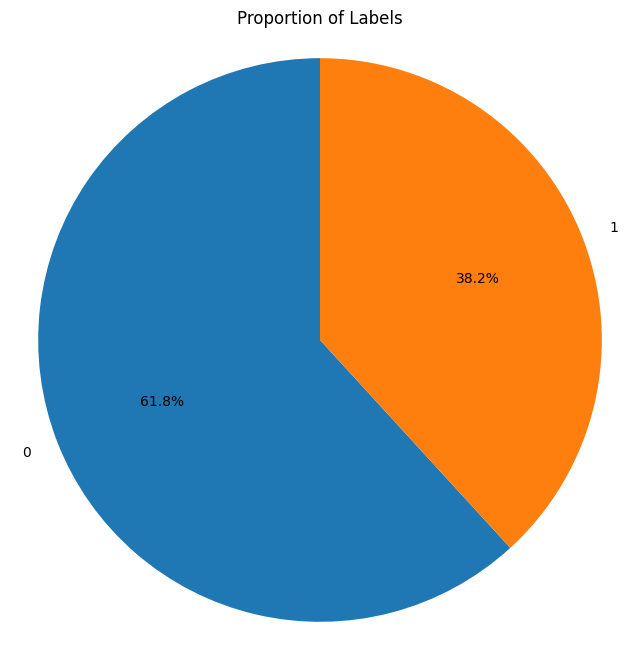

In [20]:
# Assuming 'label' is the column you want to visualize
label_counts = df['label'].value_counts()

# Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Labels')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

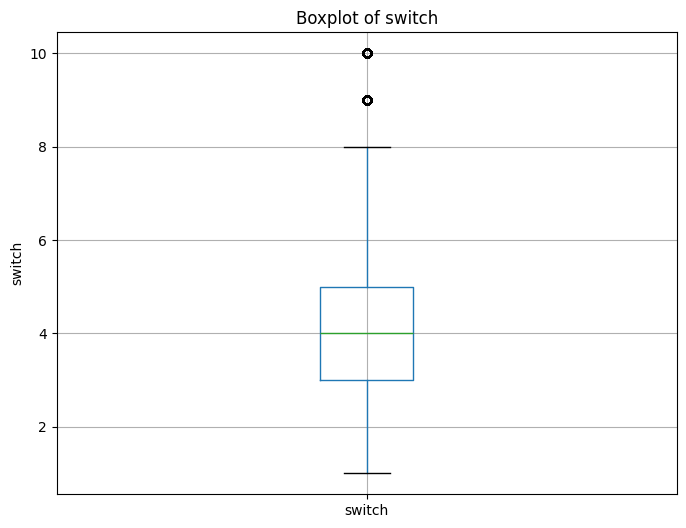

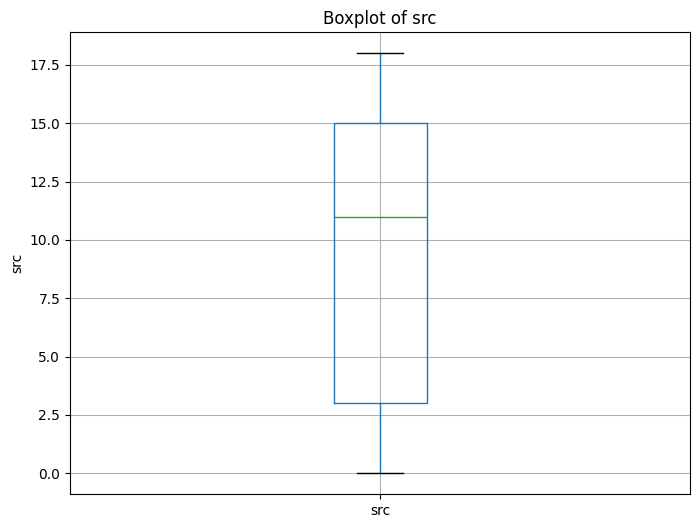

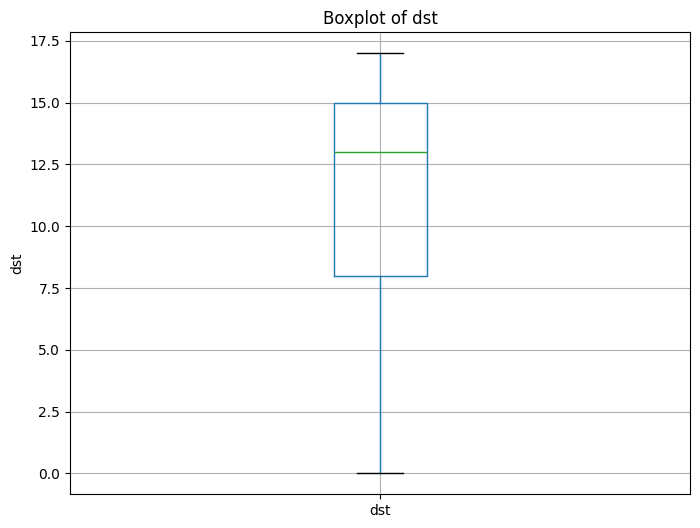

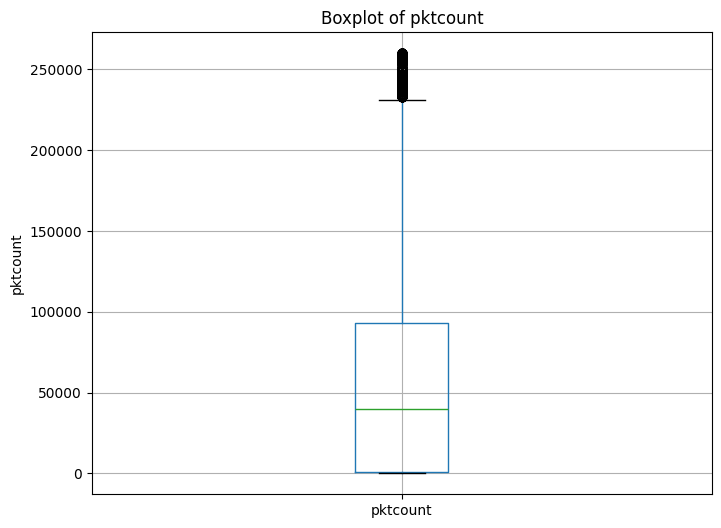

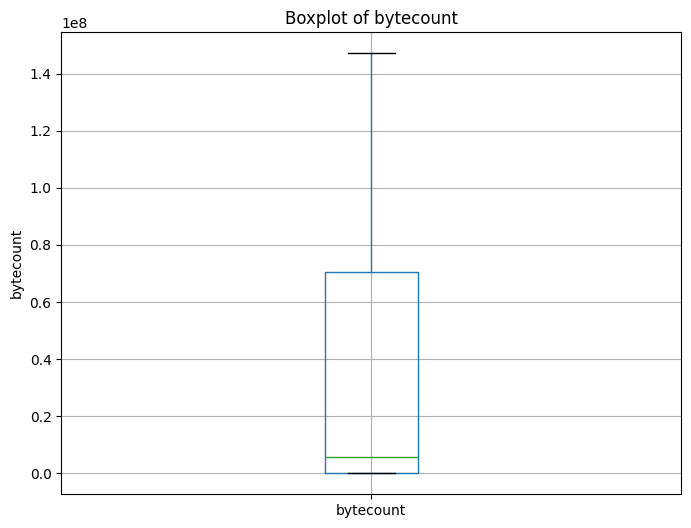

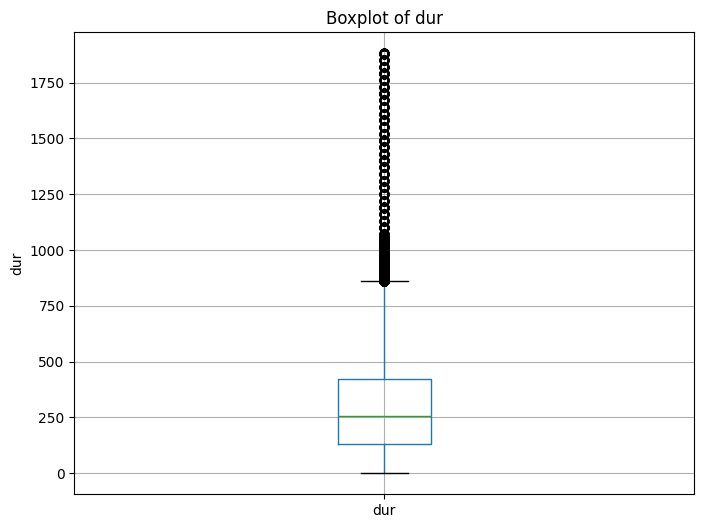

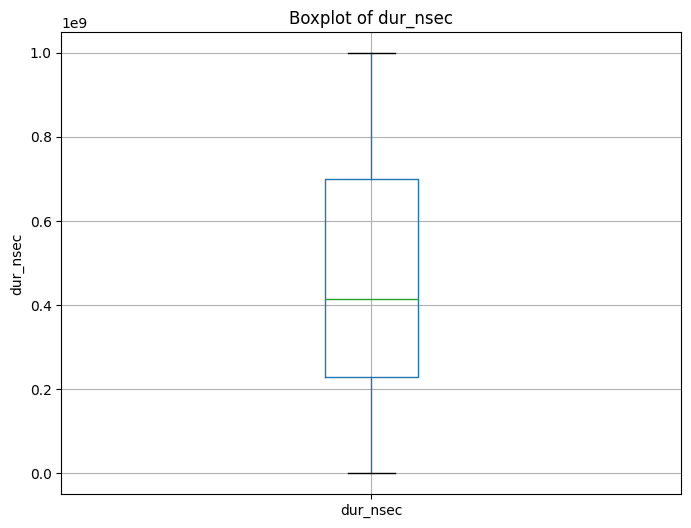

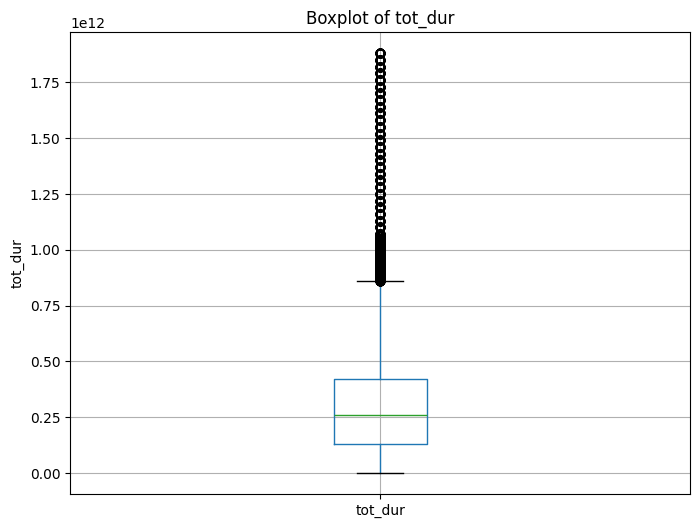

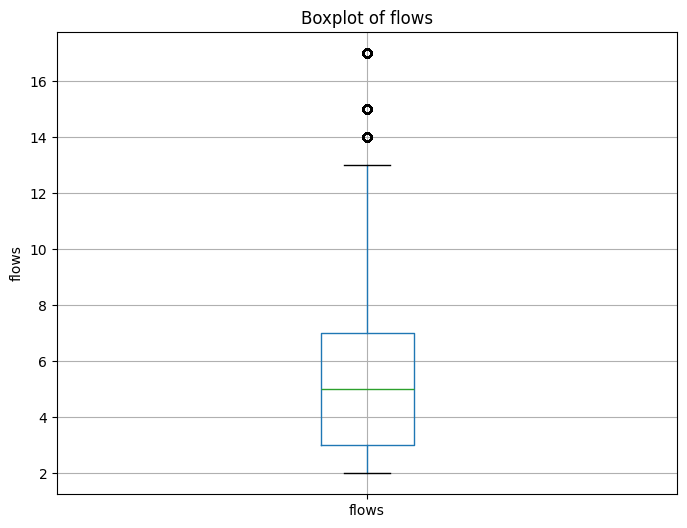

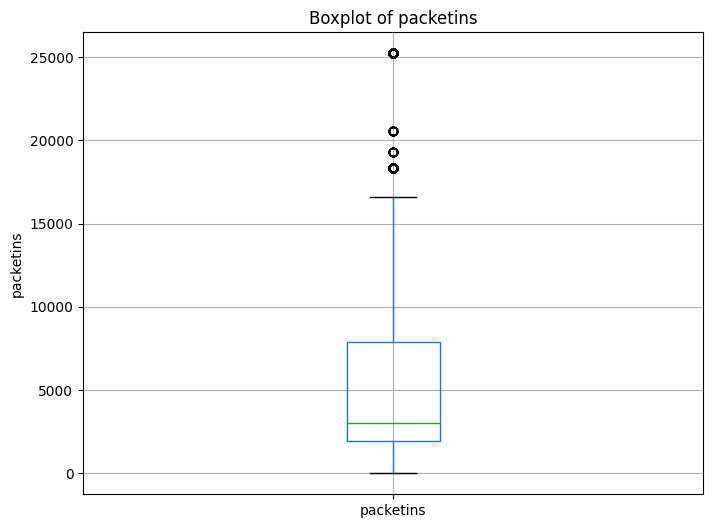

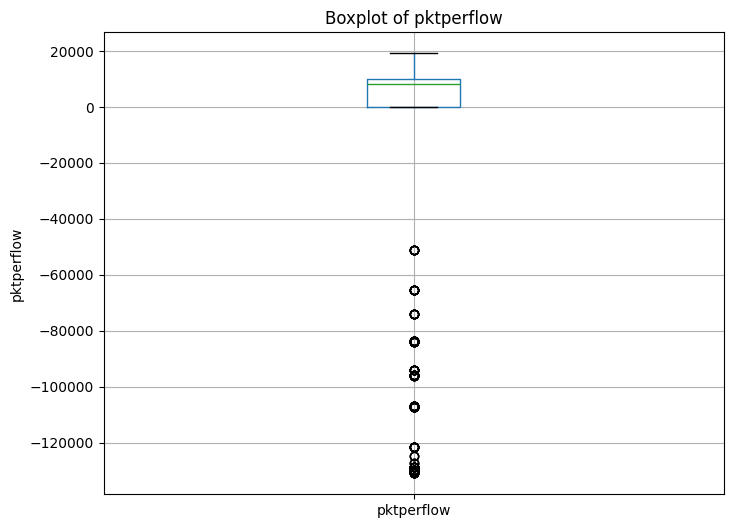

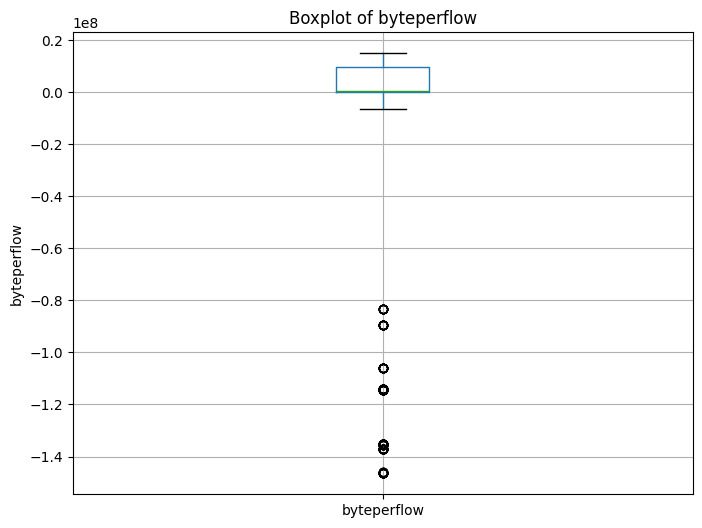

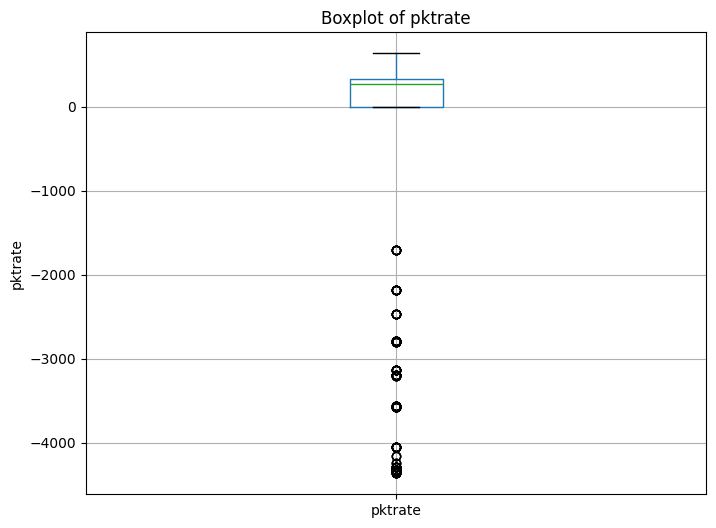

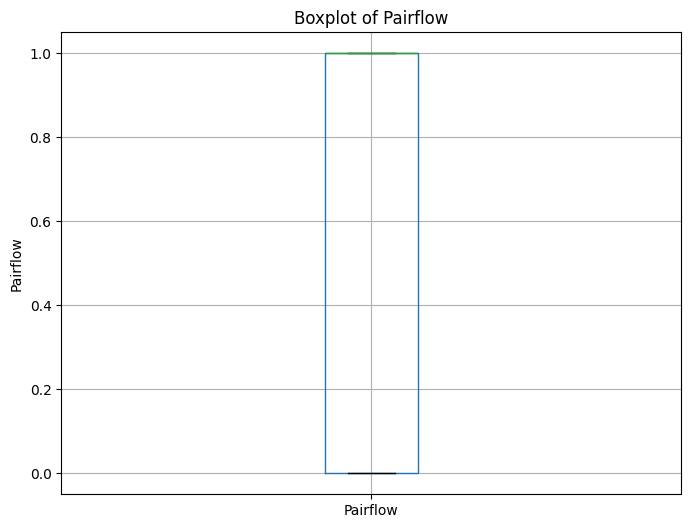

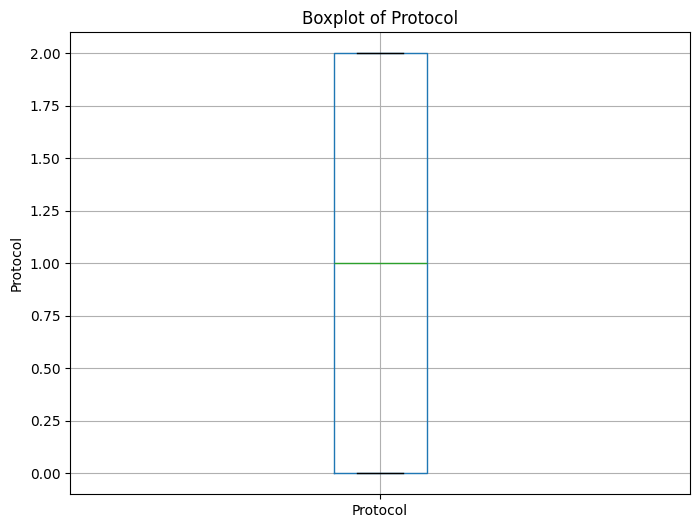

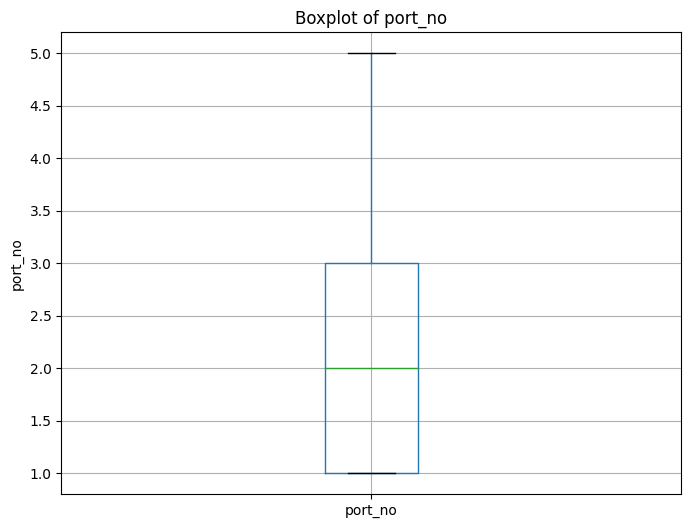

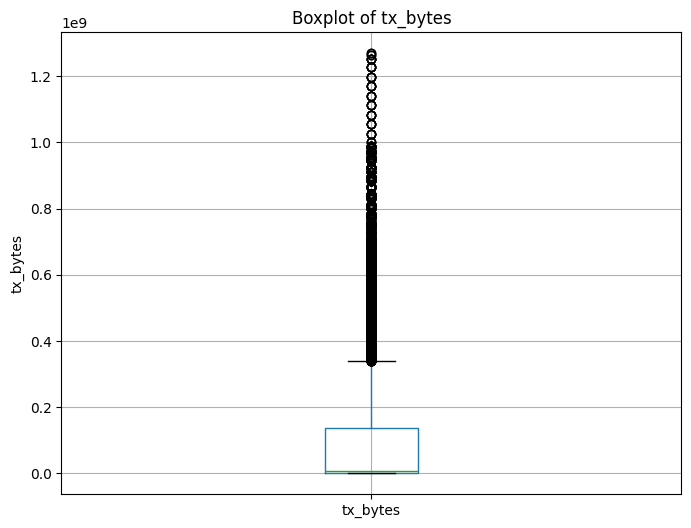

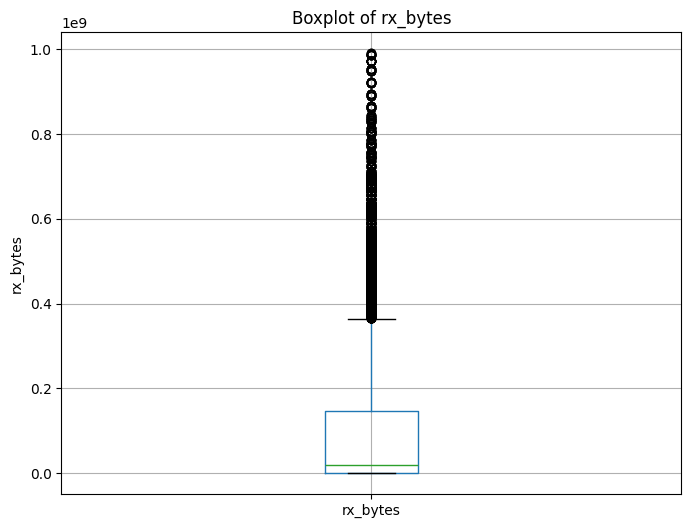

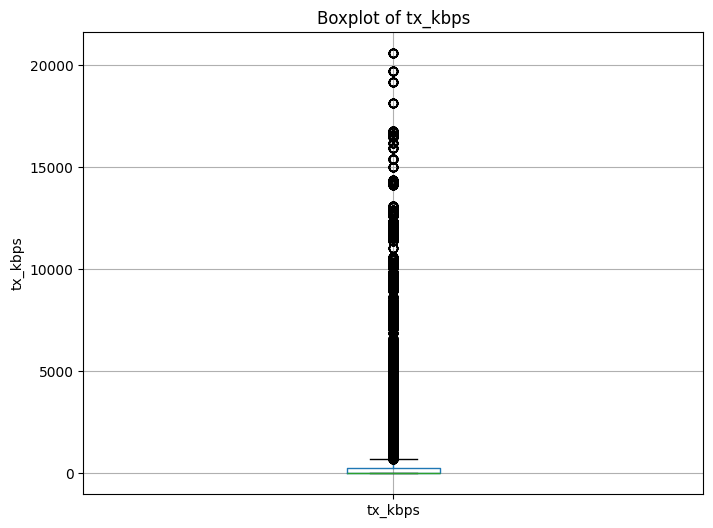

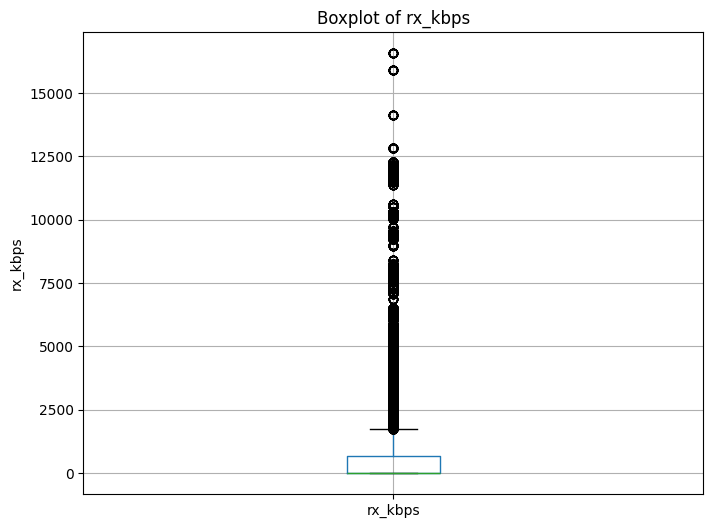

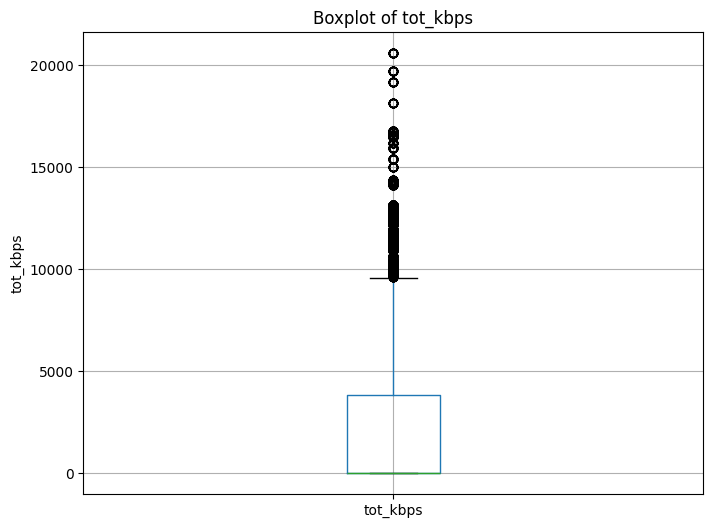

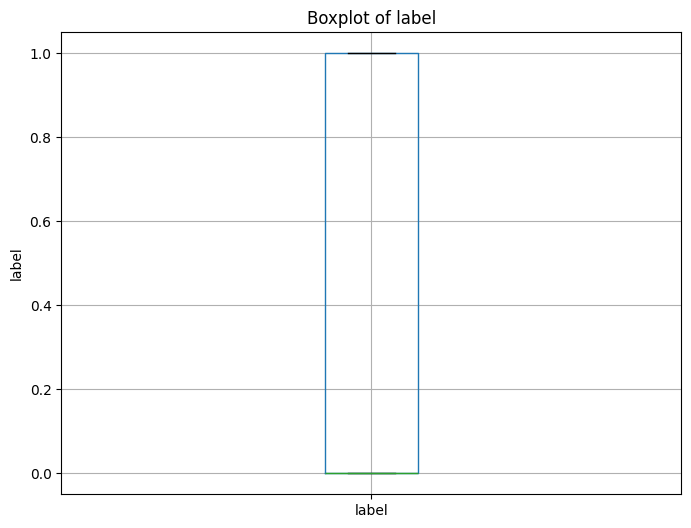

In [21]:
# Create boxplots for each feature
for column in df.columns:
    plt.figure(figsize=(8, 6))  # Adjust figure size if needed
    df.boxplot(column=column)
    plt.title(f'Boxplot of {column}')
    plt.ylabel(column)
    plt.show()

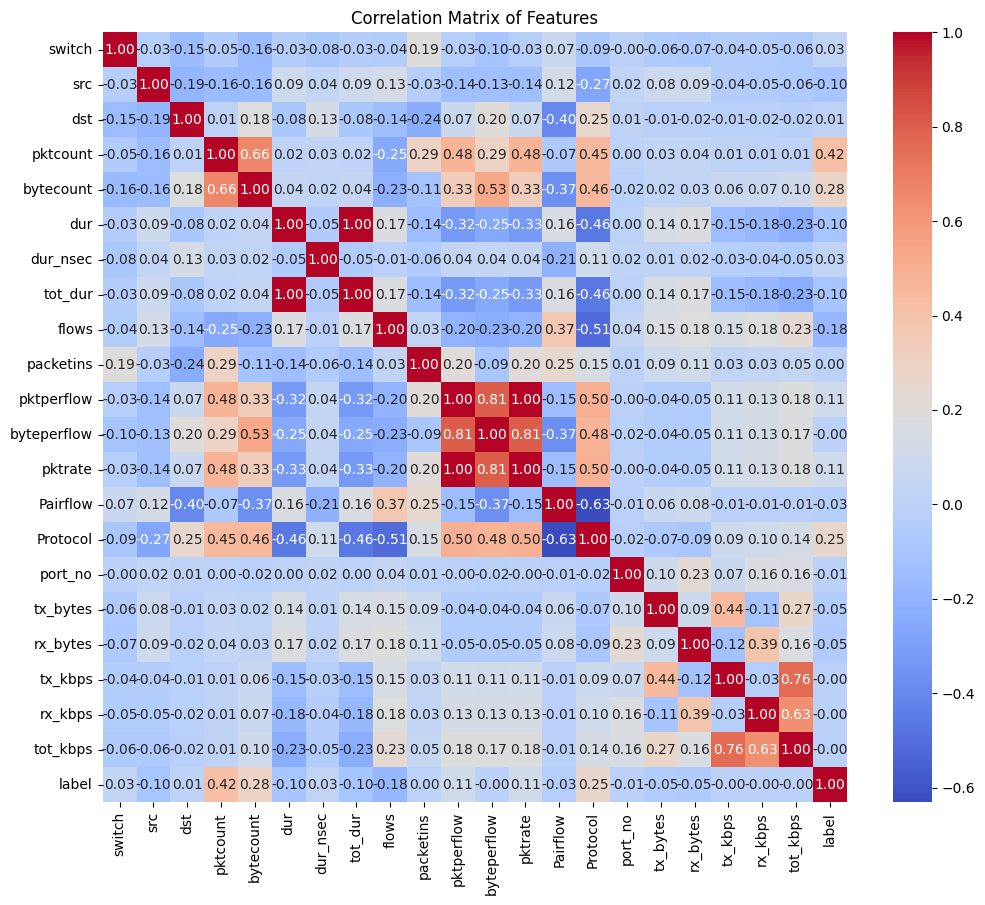

In [22]:
# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

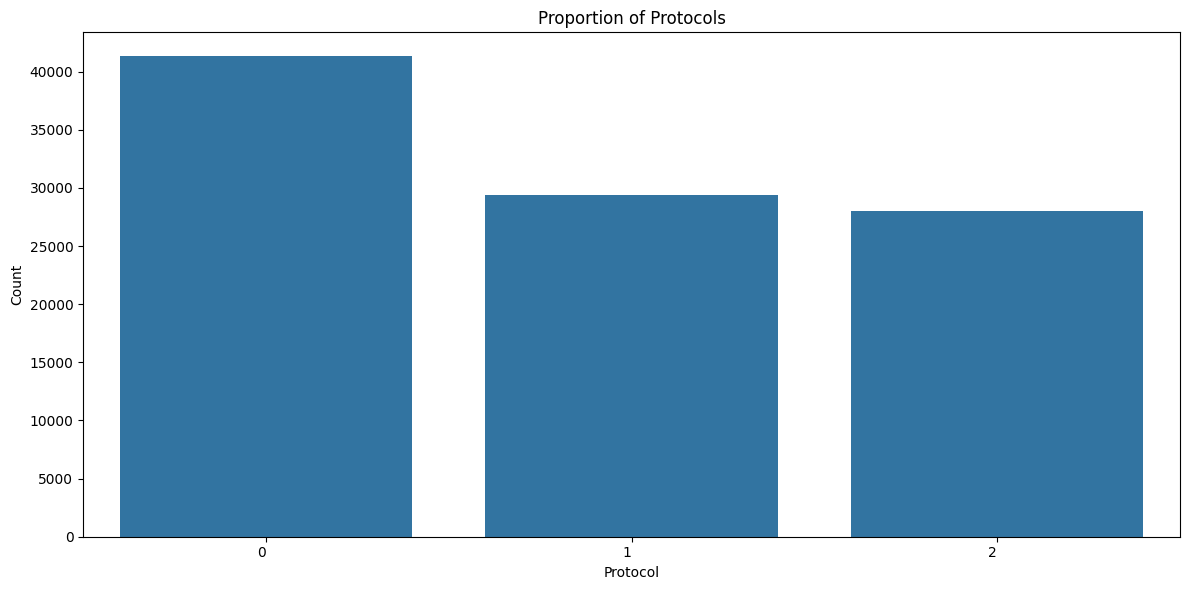

In [23]:
protocol_counts = df['Protocol'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
plt.xlabel('Protocol')
plt.ylabel('Count')
plt.title('Proportion of Protocols')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

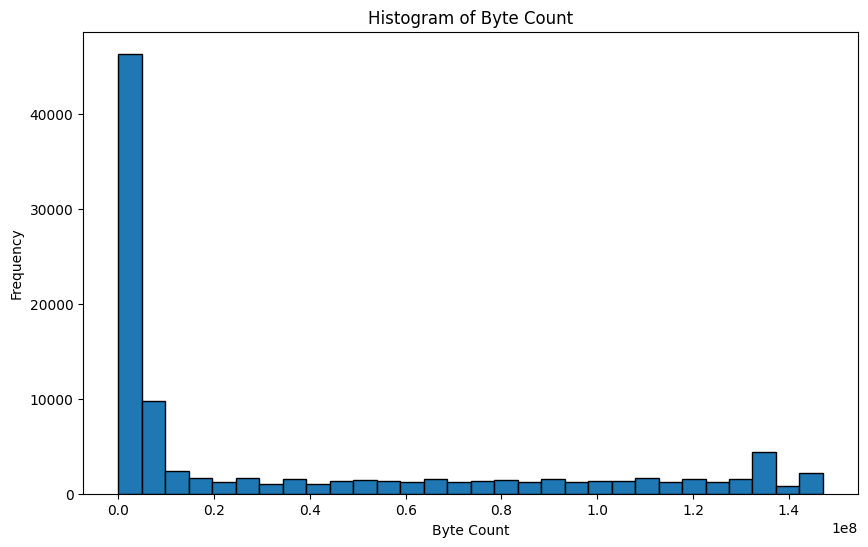

In [24]:
plt.figure(figsize=(10, 6))
plt.hist(df['bytecount'], bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Byte Count')
plt.ylabel('Frequency')
plt.title('Histogram of Byte Count')
plt.show()

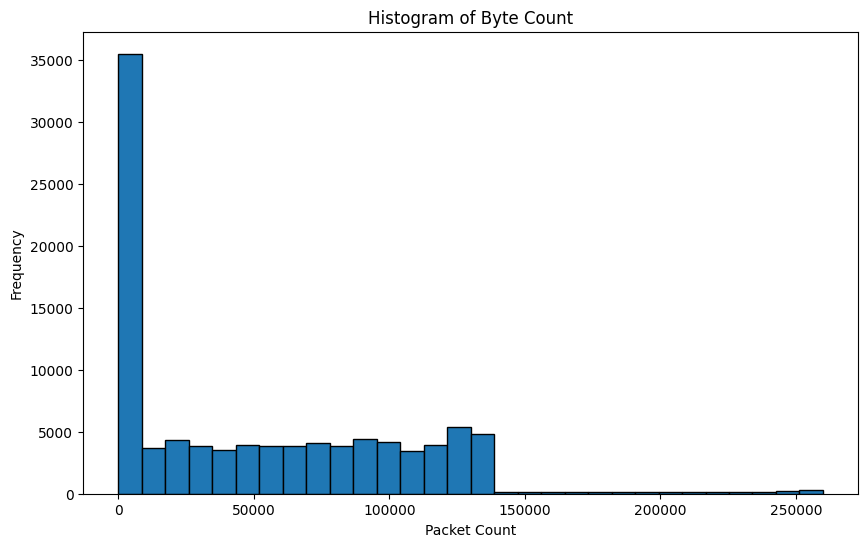

In [25]:
plt.figure(figsize=(10, 6))
plt.hist(df['pktcount'], bins=30, edgecolor='black')  # Adjust the number of bins as needed
plt.xlabel('Packet Count')
plt.ylabel('Frequency')
plt.title('Histogram of Byte Count')
plt.show()

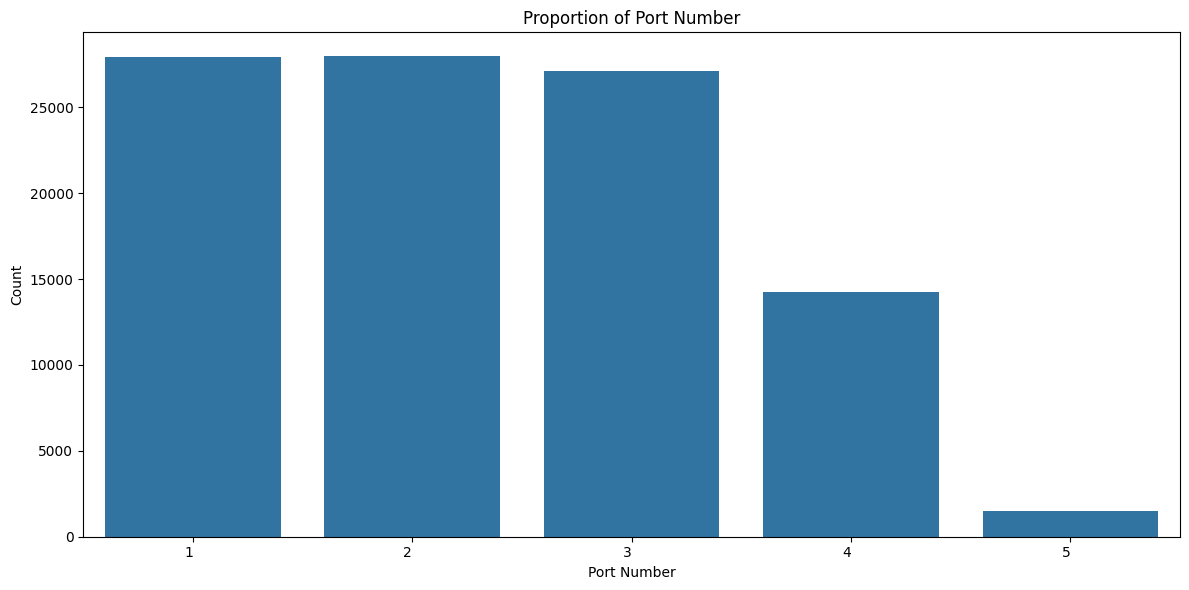

In [26]:
protocol_counts = df['port_no'].value_counts()

# Create the bar chart
plt.figure(figsize=(12, 6))  # Adjust figure size as needed
sns.barplot(x=protocol_counts.index, y=protocol_counts.values)
plt.xlabel('Port Number')
plt.ylabel('Count')
plt.title('Proportion of Port Number')
plt.xticks(rotation=0, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

## Data Processing

In [27]:
# Select numerical features for scaling (exclude categorical features and the target variable)
numerical_features = df.select_dtypes(include=['number']).drop(columns=['label'], errors='ignore').columns

# Create a MinMaxScaler object
scaler = StandardScaler()

# Fit the scaler to the numerical features and transform the data
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the scaled DataFrame
print("Scaled DataFrame:")
display(df.head())

Scaled DataFrame:


,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,-1.648834,-1.528313,0.957023,-0.126567,0.249813,-0.794736,0.924029,-0.792925,-0.935255,-0.636419,...,0.98066,-1.319131,1.372663,0.624280,0.301323,-0.727727,-0.420919,-0.499021,-0.651783,0
1,-1.648834,-1.528313,0.957023,1.419807,2.038018,-0.170055,0.988676,-0.167989,-1.272284,-0.636419,...,0.98066,-1.319131,1.372663,1.550805,-0.634033,-0.727730,-0.420919,-0.499021,-0.651783,0
2,-1.648834,0.098927,0.957023,0.732119,1.242785,-0.447691,1.024592,-0.445738,-0.935255,-0.636419,...,0.98066,-1.319131,1.372663,-1.228771,-0.634033,-0.727747,-0.420919,-0.499021,-0.651783,0
3,-1.648834,0.098927,0.957023,0.732119,1.242785,-0.447691,1.024592,-0.445738,-0.935255,-0.636419,...,0.98066,-1.319131,1.372663,-0.302246,-0.634034,-0.727745,-0.420919,-0.499021,-0.651783,0
4,-1.648834,0.098927,0.957023,0.732119,1.242785,-0.447691,1.024592,-0.445738,-0.935255,-0.636419,...,0.98066,-1.319131,1.372663,0.624280,-0.634036,-0.727729,-0.420919,-0.499021,-0.651783,0


In [28]:
X = df.drop('label', axis=1)
y = df['label']

In [29]:
# Hitung Mutual Information
mi_scores = mutual_info_classif(X, y, discrete_features='auto', random_state=42)

# Konversi ke DataFrame agar mudah dibaca
mi_df = pd.DataFrame({'Feature': X.columns, 'Mutual Information': mi_scores})
mi_df = mi_df.sort_values(by='Mutual Information', ascending=False)  # Urutkan dari yang tertinggi

# Tampilkan hasil
print(mi_df)

        Feature  Mutual Information
4     bytecount            0.628482
3      pktcount            0.611059
11  byteperflow            0.551416
10   pktperflow            0.532835
12      pktrate            0.376283
7       tot_dur            0.259515
16     tx_bytes            0.208979
9     packetins            0.193970
5           dur            0.191953
17     rx_bytes            0.179109
20     tot_kbps            0.109207
19      rx_kbps            0.075825
1           src            0.075504
18      tx_kbps            0.070788
6      dur_nsec            0.058867
14     Protocol            0.041158
2           dst            0.036157
8         flows            0.026804
13     Pairflow            0.006304
15      port_no            0.004659
0        switch            0.003096


In [30]:
# Split data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary data into validation and test sets (50% val, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now you have:
# - X_train, y_train: Training data
# - X_val, y_val: Validation data
# - X_test, y_test: Test data
print(f"Training data shape: {X_train.shape}")
print(f"Validation data shape: {X_val.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (78998, 21)
Validation data shape: (9875, 21)
Test data shape: (9875, 21)


In [31]:
df.to_csv('processed_data.csv', index=False)

## Train Model

### All Dataset

In [32]:
X = df.drop('label', axis=1)
y = df['label']

In [33]:
# Split data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary data into validation and test sets (50% val, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Random Forest

In [34]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model.predict(X_test)

# Evaluasi
print("\n🎯 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



🎯 Random Forest Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6060
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      9875
   macro avg       1.00      1.00      1.00      9875
weighted avg       1.00      1.00      1.00      9875

Confusion Matrix:
 [[6060    0]
 [   0 3815]]


#### XGBoost

In [36]:
xgb_model = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Prediksi
y_pred_xgb = xgb_model.predict(X_test)

# Evaluasi
print("\n🚀 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



🚀 XGBoost Results:
Accuracy: 0.9997974683544304
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6060
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      9875
   macro avg       1.00      1.00      1.00      9875
weighted avg       1.00      1.00      1.00      9875

Confusion Matrix:
 [[6058    2]
 [   0 3815]]


In [37]:
print("\nModel Comparison:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


Model Comparison:
Random Forest Accuracy: 1.0000
XGBoost Accuracy: 0.9998


#### Tabnet

In [38]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from pytorch_tabnet.tab_model import TabNetClassifier

In [39]:
# Konversi DataFrame ke NumPy Array
X_train_np = X_train.values
X_val_np = X_val.values
X_test_np = X_test.values
y_train_np = y_train.values
y_val_np = y_val.values
y_test_np = y_test.values

In [40]:
# Inisialisasi Model TabNet
tabnet_model = TabNetClassifier(verbose=1, seed=42)

# Training
tabnet_model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_metric=['accuracy'],
    patience=10,
    max_epochs=100,
    batch_size=256
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.21261 | val_0_accuracy: 0.92527 |  0:00:08s
epoch 1  | loss: 0.10026 | val_0_accuracy: 0.9197  |  0:00:16s
epoch 2  | loss: 0.07112 | val_0_accuracy: 0.96678 |  0:00:25s
epoch 3  | loss: 0.0639  | val_0_accuracy: 0.92678 |  0:00:33s
epoch 4  | loss: 0.05731 | val_0_accuracy: 0.96891 |  0:00:42s
epoch 5  | loss: 0.05744 | val_0_accuracy: 0.9517  |  0:00:51s
epoch 6  | loss: 0.05508 | val_0_accuracy: 0.95615 |  0:00:59s
epoch 7  | loss: 0.04851 | val_0_accuracy: 0.95332 |  0:01:09s
epoch 8  | loss: 0.0455  | val_0_accuracy: 0.90522 |  0:01:18s
epoch 9  | loss: 0.04087 | val_0_accuracy: 0.95443 |  0:01:27s
epoch 10 | loss: 0.04297 | val_0_accuracy: 0.94197 |  0:01:35s
epoch 11 | loss: 0.04127 | val_0_accuracy: 0.95301 |  0:01:44s
epoch 12 | loss: 0.03576 | val_0_accuracy: 0.90066 |  0:01:52s
epoch 13 | loss: 0.04117 | val_0_accuracy: 0.63392 |  0:02:01s
epoch 14 | loss: 0.03796 | val_0_accuracy: 0.9599  |  0:02:09s

Early stopping occurred at epoch 14 with best_epoch = 

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [41]:
# Prediksi
y_pred_tabnet = tabnet_model.predict(X_test_np)

In [42]:
# Evaluasi
print("TabNet Results:")
print("Accuracy:", accuracy_score(y_test_np, y_pred_tabnet))
print(classification_report(y_test_np, y_pred_tabnet))
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred_tabnet))

TabNet Results:
Accuracy: 0.9694177215189873
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6060
           1       0.93      1.00      0.96      3815

    accuracy                           0.97      9875
   macro avg       0.96      0.97      0.97      9875
weighted avg       0.97      0.97      0.97      9875

Confusion Matrix:
 [[5775  285]
 [  17 3798]]


### Tpo 6 Column

In [43]:
x = df[['bytecount', 'pktcount', 'byteperflow', 'pktperflow', 'pktrate', 'tot_dur']]
y = df['label']

In [44]:
x

,bytecount,pktcount,byteperflow,pktperflow,pktrate,tot_dur
0,0.249813,-0.126567,1.324460,0.979380,0.980660,-0.792925
1,2.038018,1.419807,1.323897,0.978847,0.980660,-0.167989
2,1.242785,0.732119,1.324319,0.979247,0.980660,-0.445738
3,1.242785,0.732119,1.324319,0.979247,0.980660,-0.445738
4,1.242785,0.732119,1.324319,0.979247,0.980660,-0.445738
...,...,...,...,...,...,...
98743,-0.749062,-0.988990,-0.580203,-0.821292,-0.822989,-0.859439
98744,-0.749062,-0.988990,-0.580203,-0.821292,-0.822989,-0.859439
98745,-0.749160,-0.989906,-0.580190,-0.821159,-0.818990,-1.033161
98746,-0.749160,-0.989906,-0.580190,-0.821159,-0.818990,-1.033161


In [45]:
# Split data into training and temporary sets (80% train, 20% temp)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)

# Split temporary data into validation and test sets (50% val, 50% test)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

#### Random Forest

In [46]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [47]:
rf_model_2 = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_2.fit(X_train, y_train)

# Prediksi
y_pred_rf = rf_model_2.predict(X_test)

# Evaluasi
print("\n🎯 Random Forest Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



🎯 Random Forest Results:
Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6060
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      9875
   macro avg       1.00      1.00      1.00      9875
weighted avg       1.00      1.00      1.00      9875

Confusion Matrix:
 [[6060    0]
 [   0 3815]]


#### XGBoost

In [48]:
xgb_model_2 = xgb.XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb_model_2.fit(X_train, y_train, eval_set=[(X_val, y_val)], verbose=False)

# Prediksi
y_pred_xgb = xgb_model_2.predict(X_test)

# Evaluasi
print("\n🚀 XGBoost Results:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))



🚀 XGBoost Results:
Accuracy: 0.9997974683544304
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6060
           1       1.00      1.00      1.00      3815

    accuracy                           1.00      9875
   macro avg       1.00      1.00      1.00      9875
weighted avg       1.00      1.00      1.00      9875

Confusion Matrix:
 [[6058    2]
 [   0 3815]]


In [49]:
print("\nModel Comparison:")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")


Model Comparison:
Random Forest Accuracy: 1.0000
XGBoost Accuracy: 0.9998


#### Tabnet

In [50]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from pytorch_tabnet.tab_model import TabNetClassifier

In [51]:
# Konversi DataFrame ke NumPy Array
X_train_np = X_train.values
X_val_np = X_val.values
X_test_np = X_test.values
y_train_np = y_train.values
y_val_np = y_val.values
y_test_np = y_test.values

In [52]:
# Inisialisasi Model TabNet
tabnet_model_2 = TabNetClassifier(verbose=1, seed=42)

# Training
tabnet_model_2.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_val_np, y_val_np)],
    eval_metric=['accuracy'],
    patience=10,
    max_epochs=100,
    batch_size=256
)

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.21261 | val_0_accuracy: 0.92527 |  0:00:08s
epoch 1  | loss: 0.10026 | val_0_accuracy: 0.9197  |  0:00:17s
epoch 2  | loss: 0.07112 | val_0_accuracy: 0.96678 |  0:00:25s
epoch 3  | loss: 0.0639  | val_0_accuracy: 0.92678 |  0:00:34s
epoch 4  | loss: 0.05731 | val_0_accuracy: 0.96891 |  0:00:43s
epoch 5  | loss: 0.05744 | val_0_accuracy: 0.9517  |  0:00:51s
epoch 6  | loss: 0.05508 | val_0_accuracy: 0.95615 |  0:00:59s
epoch 7  | loss: 0.04851 | val_0_accuracy: 0.95332 |  0:01:08s
epoch 8  | loss: 0.0455  | val_0_accuracy: 0.90522 |  0:01:16s
epoch 9  | loss: 0.04087 | val_0_accuracy: 0.95443 |  0:01:25s
epoch 10 | loss: 0.04297 | val_0_accuracy: 0.94197 |  0:01:33s
epoch 11 | loss: 0.04127 | val_0_accuracy: 0.95301 |  0:01:41s
epoch 12 | loss: 0.03576 | val_0_accuracy: 0.90066 |  0:01:50s
epoch 13 | loss: 0.04117 | val_0_accuracy: 0.63392 |  0:01:59s
epoch 14 | loss: 0.03796 | val_0_accuracy: 0.9599  |  0:02:07s

Early stopping occurred at epoch 14 with best_epoch = 

/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


In [53]:
# Prediksi
y_pred_tabnet = tabnet_model.predict(X_test_np)

In [54]:
# Evaluasi
print("TabNet Results:")
print("Accuracy:", accuracy_score(y_test_np, y_pred_tabnet))
print(classification_report(y_test_np, y_pred_tabnet))
print("Confusion Matrix:\n", confusion_matrix(y_test_np, y_pred_tabnet))

TabNet Results:
Accuracy: 0.9694177215189873
              precision    recall  f1-score   support

           0       1.00      0.95      0.97      6060
           1       0.93      1.00      0.96      3815

    accuracy                           0.97      9875
   macro avg       0.96      0.97      0.97      9875
weighted avg       0.97      0.97      0.97      9875

Confusion Matrix:
 [[5775  285]
 [  17 3798]]
